# Literature Review & Decision Matrix
## Joseph Cristiano
The purpose of this document is to present the review on digitial agriculture techniques in the framing of "the problem", how do we extract phenotypes of brace roots in maize and sorghum as fast as possible.     
The plan for this document is to consider every approach to each part of the problem and create a table of scores for each of them. At the end, we'll be able to use this table to decide on a plan of action for the project. 

### Section 1: The Big Picture 
Below is a diagram of the manual phenotyping process
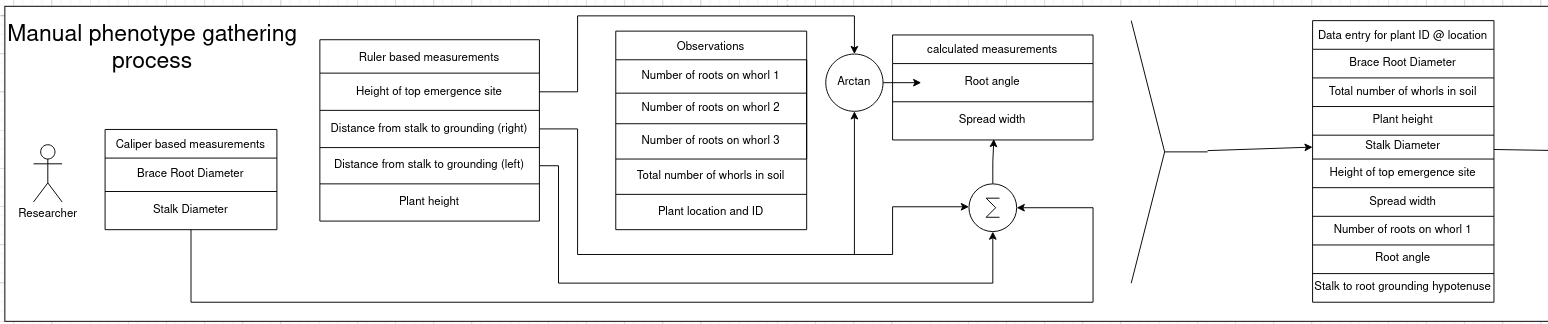

Using this as a reference we can list the specific challenges that come with collecting this data. 

 - Field traversal => Who or what will be traversing where?
 - Modality of measurement  =>  Calipers, 2D distance, 3D distance? (The how)
 - Spatiotemporal data => Where & When is equally as important as the data being collected

Each of these will be a section, and each of those sections will lead to entries in our table.  

Now we implement our scoring system. We'll grade everything on a 0-100 scale (0 = bad, 100 = good)     
Here is a list of priorities:
- Accuracy of measurements => Does this make the data higher or lower in quality?
- Cost in man-hours  => Does this make the testing day longer or shorter for the researcher?
- Cost of investment => Is the cost of the solution feasible?
- Implementation time  => Is the time investment required to build the solution feasible?
- Time-to-data => Once testing day is done, will the data be available sooner or later? 
- Potential value add => Does this solution have potential to add more insights to the research?
- Symbiosis => Does using this solution work with the others on the table?


In [1]:
import pandas as pd
from IPython.display import display

# Create an empty dataframe with the specified header
df = pd.DataFrame(columns=['Problem', 'Solution', 'Accuracy Score', 'Man-hour Score', 'Investment Cost Score', 'Implementation Time Score', 'Time-to-data Complexity', 'Potential Value Score', 'Symbiosis Score'])

# Add an example row to the dataframe
df.loc[len(df)] = {
    'Problem': 'Sample Problem',
    'Solution': 'Sample Solution',
    'Accuracy Score': 0,
    'Man-hour Score': 0,
    'Investment Cost Score': 0,
    'Implementation Time Score': 0,
    'Time-to-data Complexity': 0,
    'Potential Value Score': 0,
    'Symbiosis Score': 0
}

# Print the dataframe using the display function
display(df)


,Problem,Solution,Accuracy Score,Man-hour Score,Investment Cost Score,Implementation Time Score,Time-to-data Complexity,Potential Value Score,Symbiosis Score
0,Sample Problem,Sample Solution,0,0,0,0,0,0,0


### Section 2: Problems & Solutions
#### Section 2.1: Field Traversal
The "who or what" of the data collection problem.

The first entry to consider is for fully manual data collection. An extremely dedicated researcher with calipers and notebook in hand decides to gather brace root phenotypes (all 9 measurements and observations, 2 more will be calculated after the fact).
    

In [2]:
df.loc[len(df)] = {
    'Problem': '2.1 Field Traversal',
    'Solution': 'Fully Manual',
    'Accuracy Score': 50, #humans aren't accurate, yet somehow we still trust them 
    'Man-hour Score': 0,  #humans aren't cheap, at 5 minutes per plant, the data that can be collected on one day is limited
    'Investment Cost Score': 80, #The man hours are the most expensive part of this process, but plot & plant markers would be required as well
    'Implementation Time Score': 90, #Theres nothing to implement, but making sure things are consistent would require documentation 
    'Time-to-data Complexity': 80, #If you ignore the time to digitize, time to data is low
    'Potential Value Score': 0, #There is no extra data to tap into
    'Symbiosis Score': 100  #Highly symbiotic, we've had to do this when validating other solutions before.  
}

Now lets consider the case in which we develop a tool that allows the researcher to gather this data one plant at a time, 10 seconds per plant, and the method requires post processing to actually extract the phenotype data after the fact.  

In [3]:
df.loc[len(df)] = {
    'Problem': '2.1 Field Traversal',
    'Solution': 'Manual - tool assisted - post processed',
    'Accuracy Score': 90, #Offloading the measurement to something more consistent 
    'Man-hour Score': 60,  #The man hours in the field are optimized, but there remains a hidden cost to post processing 
    'Investment Cost Score': 40, #Tools have cost, post processing pipelines have cost
    'Implementation Time Score': 60, #handheld tools are easy to implement, but they and the pipelines would still need to be maintained  
    'Time-to-data Complexity': 80, #procrastination is a devil and data will sit unprocessed
    'Potential Value Score': 50, #the more potential built in the higher the cost of post processing
    'Symbiosis Score': 20  #This method would pidgeon hole us with the constraint of having to be a maneuverable tool for the field  
}

Now lets move away from humans, and towards robotics. 
The simple goal of robotics is to remove the human. But the drawbacks come in a dramatic lack of being able to adapt on the fly, and massive amounts of investment in time and money. 


In [4]:
df.loc[len(df)] = {
    'Problem': '2.1 Field Traversal',
    'Solution': 'Robotic - ground-based',
    'Accuracy Score': 90, #Offloading the measurement to something more consistent 
    'Man-hour Score': 90,  #Ideally, the need for human effort would be greatly reduced, but maintanance would be required
    'Investment Cost Score': 20, #Robots are expensive up front, with the reward of reduced labor costs over time
    'Implementation Time Score': 5, #maintaining hardware, maintaining software, and maintaining the data pipeline, all require time 
    'Time-to-data Complexity': 80, #Ideally, a pipeline can be in place to make the data available immediately
    'Potential Value Score': 80, #Depending on the data collected, the potential value could be higher than more selective methods
    'Symbiosis Score': 0  # with so much investment upfront, its a hard ask to entertain other solutions at the same time  
}

Drone robotics projects in agriculture also exist, but they rarely geared towards phenotyping, usually pest control. 
Operating a drone subcanopy would be damn near impossible.

In [5]:
df.loc[len(df)] = {
    'Problem': '2.1 Field Traversal',
    'Solution': 'Robotic - drone',
    'Accuracy Score': 5, #The ability of the sensors would be greatly limited by the payload capacity of the drone 
    'Man-hour Score': 90,  #Ideally, the need for human effort would be greatly reduced, but maintanance would be required
    'Investment Cost Score': 20, #Robots are expensive up front, with the reward of reduced labor costs over time
    'Implementation Time Score': 1, #The shear engineering work that would have to go into this would be staggering 
    'Time-to-data Complexity': 80, #Processing could never happen on-board, there would need to be a pipeline for after
    'Potential Value Score': 80, #Depending on the data collected, the potential value could be higher than more selective methods
    'Symbiosis Score': 0  # This is just a bad idea  
}

#### Section 2.2: Modality of Measurement
Now we can start to discuss the most complex part of the problem.    
Like the previous section, we'll start with the most manual method. Calipers.     
Using a set of calipers and a ruler, a researcher must measure:
- Stalk diameter
- Brace root diameter (one per plant)
- Height of the top whorl with roots in the soil
- Distance from stalk to root grounding point (left)
- Distance from stalk to root grounding point (right)
- Number of roots per whorl
- Number of whorls in the soil
- Plant Identifier (location in the field)

In [6]:
df.loc[len(df)] = {
    'Problem': '2.2 Modality of Measurement',
    'Solution': 'Fully Manual',
    'Accuracy Score': 50, #humans aren't accurate, yet somehow we still trust them 
    'Man-hour Score': 5,  #This is a very slow process
    'Investment Cost Score': 80, #The man hours are the most expensive part of this process, but plot & plant markers would be required as well
    'Implementation Time Score': 90, #theres nothing to implement, but making sure things are consistent would require documentation 
    'Time-to-data Complexity': 90, #once digitized, the data would be available
    'Potential Value Score': 5, #There is no extra data to tap into
    'Symbiosis Score': 100  #Highly symbiotic, we've had to do this when validating other solutions before.   
}

Another method of measurement is using 2 dimensional images. To get a measurement from an image a few choices have to be made.      
Option 1: each image has a reference marker with a known size, from this, we can get pixels per metric ratio and use the pythagorean distance formula for 2D coordinate systems to get our measurements. Heres a diagram of that workflow:
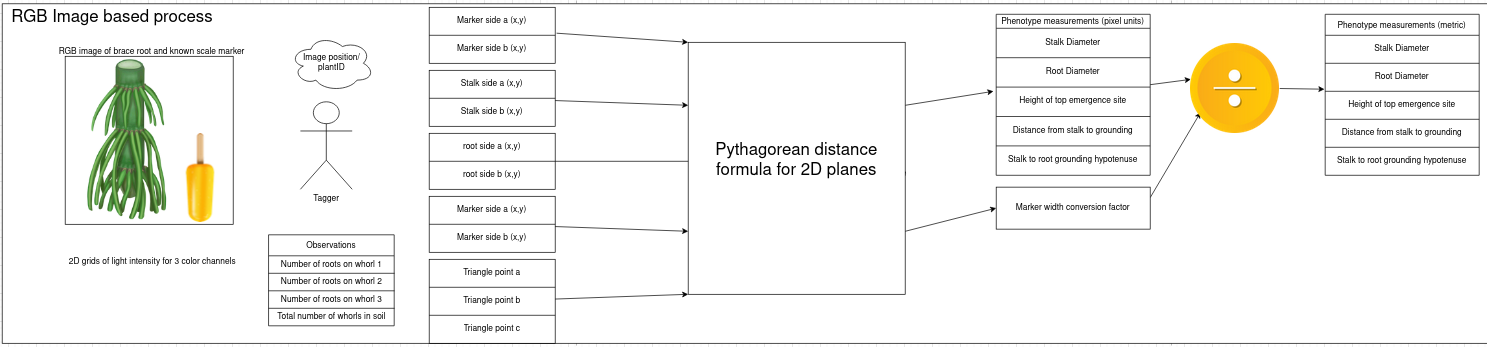

In [7]:
df.loc[len(df)] = {
    'Problem': '2.2 Modality of Measurement',
    'Solution': '2D Images - Scale markers',
    'Accuracy Score': 90, #Once validated, this method is consistent and accurate 
    'Man-hour Score': 40,  #someone has to take the pictures, and most importantly someone has to put the scale markers out
    'Investment Cost Score': 80, #The man hours are the most expensive part of this process, but plot & plant markers would be required as well
    'Implementation Time Score': 70, #The pipeline to convert these images to our desired data could be implemented and optimizes quickly 
    'Time-to-data Complexity': 20, #Digitization is automatic, but the post processing pipline would be heavier
    'Potential Value Score': 50, #If new requirements from this data arise after the fact, there is potential to re-analyse old data
    'Symbiosis Score': 60  #This solution can be used in conjunction with other solutions with some crafty implementation   
}

By fixing a few things such as: 
- Focal length of the camera lens
- Distance from the lens to the subject
- Aperture setting of the camera lens

We can calculate one pixel per metric ratio and carry that throughout the field. 

In [8]:
df.loc[len(df)] = {
    'Problem': '2.2 Modality of Measurement',
    'Solution': '2D Images - fixed',
    'Accuracy Score': 90, #Once validated, this method is consistent and accurate 
    'Man-hour Score': 40,  #someone has to take the pictures
    'Investment Cost Score': 80, # once you have a camera and a consistent distance, the rest is easy
    'Implementation Time Score': 70, #The pipeline to convert these images to our desired data could be implemented and optimized quickly 
    'Time-to-data Complexity': 40, #Digitization is automatic, removing the scale markers would simplify the analysis
    'Potential Value Score': 50, #If new requirements from this data arise after the fact, there is potential to re-analyse old data
    'Symbiosis Score': 60  #This solution can be used in conjunction with other solutions with some crafty implementation   
}

Now what if me added a 3rd dimension? With cameras, we can achieve this by adding a second image taken at the same time and using the distance between the sensors as our way to calculate scale. This would create a point cloud image of 4 layers, 3 for color and a 4th for depth from the sensor. Here is a diagram of that workflow:
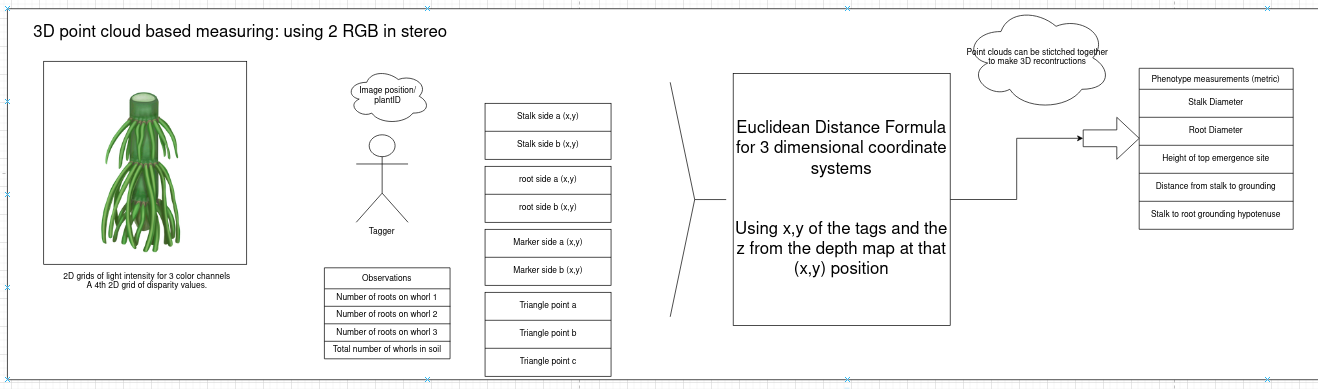

In [9]:
df.loc[len(df)] = {
    'Problem': '2.2 Modality of Measurement',
    'Solution': '3D Images - RGB-D',
    'Accuracy Score': 80, #Once validated, this method is consistent and accurate, but more suseptible to noise 
    'Man-hour Score': 40,  #someone has to take the pictures
    'Investment Cost Score': 70, # double the cameras double the cost, scale markers no longer required
    'Implementation Time Score': 60, #more configuration required to the cameras
    'Time-to-data Complexity': 60, #Adding a third dimension allows for more optimiztion of the processing pipeline
    'Potential Value Score': 70, #We have the same potential for re-analysis
    'Symbiosis Score': 90  #This solution can be used in conjunction with other solutions with some crafty implementation   
}

I should explain why the potential for pipeline optimization and potential value is higher here.     
In order to optimize this pipeline for minimizing Time-to-data, we will have to train machine learning models on this data to solve a few problems, the most important of which include:
- Identifying individual brace roots 
- Identifying stalks    

        
If we can do that then we can calculate everything else from the output of those 2 models. 

By adding that third dimension the number of training parameters and identifiable features greatly increases (in fact, it increases exponentially). According to [this paper](https://arxiv.org/pdf/2101.07612) the efficiency of the models also greatly increases. 

So using 3D data could allow us to more easily discern each individual brace root in the whorl, which can help us automate counting brace roots and measuring them. 

Not all 3D data is RGB-D. There are other options. One of which is Light Detection and Ranging (LiDAR). According to [this paper](https://www.mdpi.com/2075-1702/11/1/48) LiDAR is the 3rd most used sensor in agrcultural robotics. The working theory is that a grid of laser can be projected out towards the subject and the reflection of that grid back into the sensor will be a depth map. 

However, its my opinion that there is an incompleteness to this data, as there isn't a human viewable image in this data. 
LiDAR is often used in conjunction with RGB

In [10]:
df.loc[len(df)] = {
    'Problem': '2.2 Modality of Measurement',
    'Solution': 'Point Cloud - LiDAR',
    'Accuracy Score': 70, # possible noise problems
    'Man-hour Score': 40, #same time requirement as other imaging techniques
    'Investment Cost Score': 70, # Lidar sensors are about as expensive as cameras
    'Implementation Time Score': 60, #Configuration would be required, having a way to record plant ID would be critical 
    'Time-to-data Complexity': 50, # Idealy the same time-to-data as other image based methods
    'Potential Value Score': 60, # This data wouldn't be human viewable, but point clouds are still valueable
    'Symbiosis Score': 100  #This solution is often used in conjunction with other solutions
}

There are 3 other camera types worth mentioning. Multispectral, hyperspectral, and infrared but these don't provide any benefit to the dimensional analysis that we need to produce the data. 

Regarding infrared cameras, resolution is greatly reduced, normally to sub megapixel. This makes it a bad option for the main measurement but it has an interesting value add in that it can be used to [detect metabolic heat from bacterial growth](https://pubmed.ncbi.nlm.nih.gov/34260801/) which leads me to hypothesize that we could use it to detect and quantify brace root symbiosis with nitrogen fixing rhizobacteria. 

In [11]:
df.loc[len(df)] = {
    'Problem': '2.2 Modality of Measurement',
    'Solution': 'Thermal Camera - infrared spectrum',
    'Accuracy Score': 30, # not for dimensional analysis, possibly can image rhizobacteria
    'Man-hour Score': 40, #needs to be used in conjunction with other solutions
    'Investment Cost Score': 30, # sensors are more expensive, optics are aswell
    'Implementation Time Score': 40, # needs to be used in conjunction with other solutions
    'Time-to-data Complexity': 50, # Idealy the same time-to-data as other image based methods
    'Potential Value Score': 50, # This data wouldn't be human viewable, it might be able to help with filtering out the background
    'Symbiosis Score': 100  #needs to be used in conjunction with other solutions
}

The final 2 sensors are hyperspec and multispec. These have a similar dimensional resolution to RGB but they also have increased spectral resolution. Where RGB captures images in 3 channels, averaging spectra for visible light in the red, green, and blue band, Multispec captures more than 20 channels and hyperspec captures over 100. There is [growing use of hyperspec in plant phenotyping and disease recognition](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8983301/), taking use of the fact that hyperspectral imaging can often capture infrared spectra, allowing for all the potential uses listed above for thermal cameras. It's also used to calculate vegitation indexes from the difference between the infrared band and the visible red band. The drawbacks being heavier in investment cost and density of data.

In [12]:
df.loc[len(df)] = {
    'Problem': '2.2 Modality of Measurement',
    'Solution': 'Hyperpec & Multispec Cameras',
    'Accuracy Score': 30, # Same dimensional resolution as an RGB camera, increased spectral resolution
    'Man-hour Score': 40, #same as RGB
    'Investment Cost Score': 30, # sensors are more expensive
    'Implementation Time Score': 40, # not as simple as RGB cameras, but not by much
    'Time-to-data Complexity': 50, # Idealy the same time-to-data as other image based methods
    'Potential Value Score': 60, # Potential Vegitation indexes of braceroots
    'Symbiosis Score': 50 # The weight of the data would make symbiosis more difficult
}

#### Section 2.3: Spatiotemporal data
The final big picture problem is connecting this data to a specific time and place in the field. This is important because it allows us to create a time series of data points that can be insightful into brace root developement. 

Starting again with the fully manual option. The researcher has to note the plot and plantID at the time of collection

In [13]:
df.loc[len(df)] = {
    'Problem': '2.3 Spatiotemporal data',
    'Solution': 'Fully Manual',
    'Accuracy Score': 100, #its pretty hard to mess up date, time, & plantID 
    'Man-hour Score': 0,  #humans aren't cheap
    'Investment Cost Score': 80, #The man hours are the most expensive part of this process, but plot & plant markers would be required as well
    'Implementation Time Score': 90, #Theres nothing to implement, but making sure things are consistent would require documentation 
    'Time-to-data Complexity': 80, #If you ignore the time to digitize, time to data is low
    'Potential Value Score': 0, #There is no extra data to tap into
    'Symbiosis Score': 100  #Highly symbiotic, we've had to do this when validating other solutions before.  
}

There are a large number of ways that we can track position in the field electronically. These include:
- Radio frequency transcievers 
- GPS or GNSS
- Accelerometers & Tachometers
- Cartographic markers

Setting up a mesh network of radio transcievers would allow for a tag that can be tracked throughout the research field. Our system would be required to have high accuracy, within 10 cm. Currently, this can be achieved with four 5-GHZ trancievers that use two way ranging and time of flight principles to trilaterate an x and y position. 

The higher the transmitting frequency, the higher the accuracy of the two way ranging result. But that comes with the tradeoff of high frequency signals often have lower range and lower penetration. This becomes an issue as the area that we're trying to cover in the field grows larger and larger. 

In [14]:
df.loc[len(df)] = {
    'Problem': '2.3 Spatiotemporal data',
    'Solution': 'RF Trilateration',
    'Accuracy Score': 80, #Depending on the frequency and line of sight, this could range from sub 10cm to 1m accuracy range 
    'Man-hour Score': 50,  #Will require upkeep and calibration
    'Investment Cost Score': 80, #creating a network of RF nodes would be expensive
    'Implementation Time Score': 20, #commercial options are available, but implementation would still take time 
    'Time-to-data Complexity': 80, #The data would be available immediately
    'Potential Value Score': 40, #This would allow for a time series of a specific location in the field to be made
    'Symbiosis Score': 100  #Should be used in conjunction with other solutions  
}

Next we should discuss GNSS and GPS. They work under the same time of flight principles as the RF Trilateration above, just with a celestial network of satelites, instead of transceivers on the ground. The difference is that this option is quite a headache for some agricultural settings as the requirement for line of sight is much higher. We know that GPS has issues with dense crops such as maize and sorghum because [the canopy creates a barrier that the signals can't penetrate](http://dx.doi.org/10.1007/978-1-0716-2537-8_16). 

Also recently, it has been noticed that they are suseptible to geomagnetic interference. A recent solar flare created a geomagnetic storm [disrupting in GPS system guiding agricultural planters](https://www.agweb.com/news/crops/planting/what-farmers-need-know-about-severe-solar-event-potential-disrupt-gps) 

In [15]:
df.loc[len(df)] = {
    'Problem': '2.3 Spatiotemporal data',
    'Solution': 'Satellite positioning systems (GPS & GNSS)',
    'Accuracy Score': 70, #Depending on the line of sight between satellites, this could range from sub 10cm to 10m accuracy range 
    'Man-hour Score': 50,  #Will require upkeep and calibration
    'Investment Cost Score': 80, #If we want accuracy we will need to build or suscribe to an RTK
    'Implementation Time Score': 30, #commercial options are available, but implementation would still take time 
    'Time-to-data Complexity': 80, #The data would be available immediately
    'Potential Value Score': 40, #This would allow for a time series of a specific location in the field to be made
    'Symbiosis Score': 100  #Should be used in conjunction with other solutions  
}

The last group of sensors used in agricultural robotics are accelerometers and tachometers. These are means to track how far and in which direction the platform has travelled. These sensors should not be the only source of pose estimation on a robot. Calculating the distance traveled through acceleration requires a double integration, this introduces a second order polynomial function of drift that will cause inaccuracy that grows as a function of time. Tachometers will have inaccuracy that comes as a function of slipping and so will drift as a function of distance.

In [16]:
df.loc[len(df)] = {
    'Problem': '2.3 Spatiotemporal data',
    'Solution': 'Accelerometer & Tachometer combo',
    'Accuracy Score': 40, #Accelerometers drift over time, tachometers drift over distance 
    'Man-hour Score': 70,  #Will require upkeep and calibration
    'Investment Cost Score': 80, #With accuracy comes cost
    'Implementation Time Score': 20, #commercial options are available, signals are simple
    'Time-to-data Complexity': 80, #The data would be available immediately
    'Potential Value Score': 40, #This would allow for a time series of a specific location in the field to be made
    'Symbiosis Score': 100  #Should be used in conjunction with other solutions  
}

Another option for this data is to use identifier tags all accross the field. Something like a QR code that could be easily read by phenotyping tools and allow for informed estimates of position in the field. [This high throughput phenotyping project](https://www.hilarispublisher.com/open-access/a-mobile-robotic-platform-for-crop-monitoring-2168-9695-1000186.pdf) uses numbered plot tags to group the data and aid in their GPS guided phenotyping platform. This study was in conola, so they did not deal with the GPS issues that come with a tall crop like maize, but the approach of their project would translate well to this one.   

In [17]:
df.loc[len(df)] = {
    'Problem': '2.3 Spatiotemporal data',
    'Solution': 'Cartographic markers',
    'Accuracy Score': 50, #position would be infered based on the known marker positions and any other data we can pickup 
    'Man-hour Score': 50,  # would require tags to be printed, placed, and indexed 
    'Investment Cost Score': 90, #inexpensive
    'Implementation Time Score': 70, # inference would be a simple task to prgram
    'Time-to-data Complexity': 80, #The data would be available immediately
    'Potential Value Score': 40, #could aid in time series data 
    'Symbiosis Score': 100  #Should be used in conjunction with other solutions  
}

Concluding this section: It's best practice in the argicultural robotics space to just combine all of these sources of data and reduce the uncertainty in all of them through the use of a [Kalman Filter](10.1109/ICINIS.2015.35). Implementations of this spread far and wide throughout most robotics fields as well as other tracking tasks. Most [navigation software stacks have this included](https://docs.nav2.org/tutorials/docs/navigation2_with_gps.html?highlight=kalman), it just requires some configuration.  

In [18]:
display(df)

,Problem,Solution,Accuracy Score,Man-hour Score,Investment Cost Score,Implementation Time Score,Time-to-data Complexity,Potential Value Score,Symbiosis Score
0,Sample Problem,Sample Solution,0,0,0,0,0,0,0
1,2.1 Field Traversal,Fully Manual,50,0,80,90,80,0,100
2,2.1 Field Traversal,Manual - tool assisted - post processed,90,60,40,60,80,50,20
3,2.1 Field Traversal,Robotic - ground-based,90,90,20,5,80,80,0
4,2.1 Field Traversal,Robotic - drone,5,90,20,1,80,80,0
5,2.2 Modality of Measurement,Fully Manual,50,5,80,90,90,5,100
6,2.2 Modality of Measurement,2D Images - Scale markers,90,40,80,70,20,50,60
7,2.2 Modality of Measurement,2D Images - fixed,90,40,80,70,40,50,60
8,2.2 Modality of Measurement,3D Images - RGB-D,80,40,70,60,60,70,90
9,2.2 Modality of Measurement,Point Cloud - LiDAR,70,40,70,60,50,60,100


In [19]:
#Lets try manipulating this decision matrix
#We can sort the dataframe by a specific column
grouped_df = df.groupby('Problem')
weights = {
    'Accuracy Score': 1,
    'Man-hour Score': 0.5,
    'Investment Cost Score': 0.25,
    'Implementation Time Score': 0.25,
    'Time-to-data Complexity': 0.9,
    'Potential Value Score': 0.50,
    'Symbiosis Score': 0.60
}

weights_df = pd.DataFrame.from_dict(weights, orient = 'index', columns = ['Weight'])
display(weights_df)
#Defining a function to weight and sum the scores
def calculate_scores(df, weights):
    # Multiply each column of the DataFrame by the corresponding weight
    columns_to_weight = df.columns.difference(['Problem', 'Solution'])
    weighted_df = df[columns_to_weight].astype(float).dot(weights)
    # Sum the scores for each row
    summed_scores = weighted_df.sum(axis=1)
    
    # Add the Problem and Solution columns back to the DataFrame
    result_df = df.assign(Summed_Score=summed_scores)
    
    return result_df

,Weight
Accuracy Score,1.00
Man-hour Score,0.50
Investment Cost Score,0.25
Implementation Time Score,0.25
Time-to-data Complexity,0.90
Potential Value Score,0.50
Symbiosis Score,0.60


# Descision matrix results (data collection)
For each of the previous sections above. We'll weight and score them to find the best options

In [20]:
display(calculate_scores(grouped_df.get_group('2.1 Field Traversal'), weights_df))

,Problem,Solution,Accuracy Score,Man-hour Score,Investment Cost Score,Implementation Time Score,Time-to-data Complexity,Potential Value Score,Symbiosis Score,Summed_Score
1,2.1 Field Traversal,Fully Manual,50,0,80,90,80,0,100,224.50
2,2.1 Field Traversal,Manual - tool assisted - post processed,90,60,40,60,80,50,20,254.00
3,2.1 Field Traversal,Robotic - ground-based,90,90,20,5,80,80,0,253.25
4,2.1 Field Traversal,Robotic - drone,5,90,20,1,80,80,0,167.25


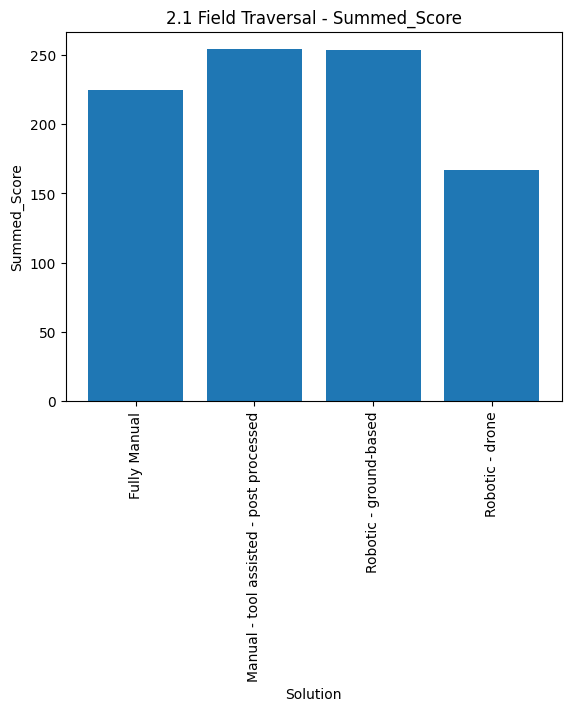

In [21]:
import matplotlib.pyplot as plt
groupname = '2.1 Field Traversal'
group = calculate_scores(grouped_df.get_group(groupname), weights_df)
dependent_variable = 'Summed_Score'
# Create the bar graph
plt.bar(group['Solution'], group[dependent_variable])

# Set the labels and title
plt.xlabel('Solution')
plt.ylabel(dependent_variable)
plt.title(groupname + ' - ' + dependent_variable)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [22]:
display(calculate_scores(grouped_df.get_group('2.2 Modality of Measurement'), weights_df))

,Problem,Solution,Accuracy Score,Man-hour Score,Investment Cost Score,Implementation Time Score,Time-to-data Complexity,Potential Value Score,Symbiosis Score,Summed_Score
5,2.2 Modality of Measurement,Fully Manual,50,5,80,90,90,5,100,238.5
6,2.2 Modality of Measurement,2D Images - Scale markers,90,40,80,70,20,50,60,226.5
7,2.2 Modality of Measurement,2D Images - fixed,90,40,80,70,40,50,60,244.5
8,2.2 Modality of Measurement,3D Images - RGB-D,80,40,70,60,60,70,90,275.5
9,2.2 Modality of Measurement,Point Cloud - LiDAR,70,40,70,60,50,60,100,257.5
10,2.2 Modality of Measurement,Thermal Camera - infrared spectrum,30,40,30,40,50,50,100,197.5
11,2.2 Modality of Measurement,Hyperpec & Multispec Cameras,30,40,30,40,50,60,50,172.5


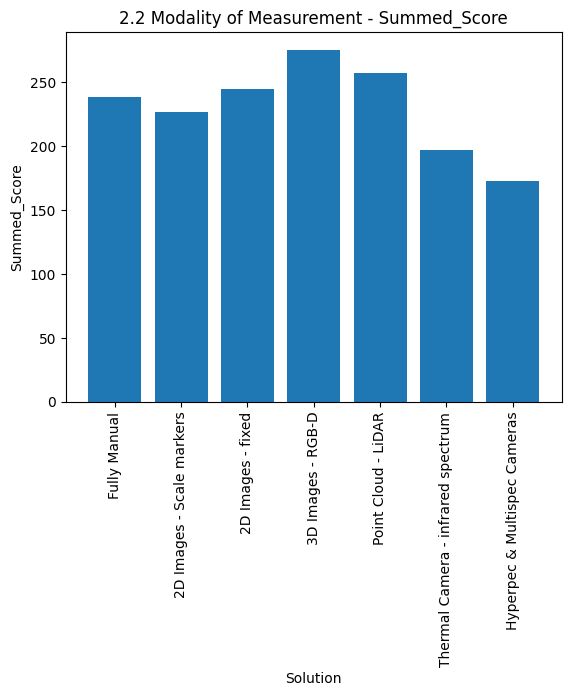

In [23]:
# Get the desired group from grouped_df
groupname = '2.2 Modality of Measurement'
group = calculate_scores(grouped_df.get_group(groupname), weights_df)
dependent_variable = 'Summed_Score'
# Create the bar graph
plt.bar(group['Solution'], group[dependent_variable])

# Set the labels and title
plt.xlabel('Solution')
plt.ylabel(dependent_variable)
plt.title(groupname + ' - ' + dependent_variable)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [24]:
display(calculate_scores(grouped_df.get_group('2.3 Spatiotemporal data'), weights_df))

,Problem,Solution,Accuracy Score,Man-hour Score,Investment Cost Score,Implementation Time Score,Time-to-data Complexity,Potential Value Score,Symbiosis Score,Summed_Score
12,2.3 Spatiotemporal data,Fully Manual,100,0,80,90,80,0,100,274.5
13,2.3 Spatiotemporal data,RF Trilateration,80,50,80,20,80,40,100,282.0
14,2.3 Spatiotemporal data,Satellite positioning systems (GPS & GNSS),70,50,80,30,80,40,100,274.5
15,2.3 Spatiotemporal data,Accelerometer & Tachometer combo,40,70,80,20,80,40,100,252.0
16,2.3 Spatiotemporal data,Cartographic markers,50,50,90,70,80,40,100,267.0


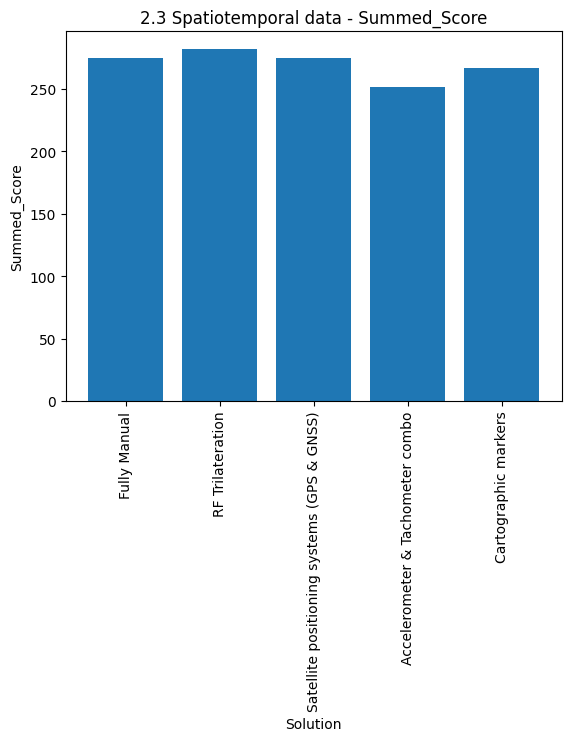

In [25]:
# Get the desired group from grouped_df
groupname = '2.3 Spatiotemporal data'
group = calculate_scores(grouped_df.get_group(groupname), weights_df)
dependent_variable = 'Summed_Score'
# Create the bar graph
plt.bar(group['Solution'], group[dependent_variable])

# Set the labels and title
plt.xlabel('Solution')
plt.ylabel(dependent_variable)
plt.title(groupname + ' - ' + dependent_variable)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [26]:
df.to_csv('descision_matrix.csv', index=False)

# Section 3: Data analysis 

"Acquisition should be driven by the analysis"       


It is important to consider the endpoints of a study. The reality of the matter is that data collected but not properly leveraged is a waste of resources. The highest quality of data science is achieved when there is a plan and purpose for every measurement from the time its measured to the time it contributes to the figures in your paper. Will we always achieve this perfect scientific approach? Absolutely-fucking-not, but if we shoot for the moon even if we miss, we'll land among the stars.    

PlantCV, a open source wrapper for openCV focused on the plant phenotyping community has this to say in their documentation page titled ["Analysis Approaches"](https://plantcv.readthedocs.io/en/latest/analysis_approach/)      

"When starting an image-based phenotyping project it is important to consider what the end goals of the project are. This is important because the goals of the project will determine the camera type, imaging layout, and will help to guide downstream analysis. For example, if the goal of the project is to quantify the growth rates of a population of Arabidopsis plants, you may want to take timelapse images of whole flats of plants with an RGB (VIS) camera. If it was an experiment focused on drought of maize plants and your goal was to get information about water content of plants you might want to take side-view and top-view images of a single plant with a near-infrared camera. If the goal of the project is to classify disease symptoms on leaves then you may want to use a scanner to take detailed images of leaf tissue." 


They also continue to list considerations that one should take for a project like this:

"It is a good idea to capture a test image and process it using PlantCV (or any other software that you might use) before capturing a full set of data. It is ALWAYS best to try to reduce potential image processing problems up front, rather than to try to process 'bad' / inconsistent images. Things to think about:

    * If color is analyzed, do you need a color card for color correction in each image?
    * If lighting is changing do you need a color card / white balance card to 'normalize' lighting across images?
    * Is the camera set at exactly the same vantage point in each image or do you need a size marker?
    * Is there enough contrast between the target object (plant) and the background or do you need to add materials to increase contrast (blue material for example).
    * If you are going to image more than one plant in an image, how long before the plants overlap each other? Is this long enough for the trait you are interested in?
"




The plan for this section of the document is to try techniques from other papers to see what is most promising...